In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

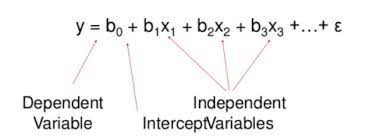

In [3]:
from IPython.display import Image
Image('./ml_source_files/다중회귀.jpg')

# 다중회귀에서 변수가 많아지면 모델이 복잡해지고 과적합 되기 쉽다.

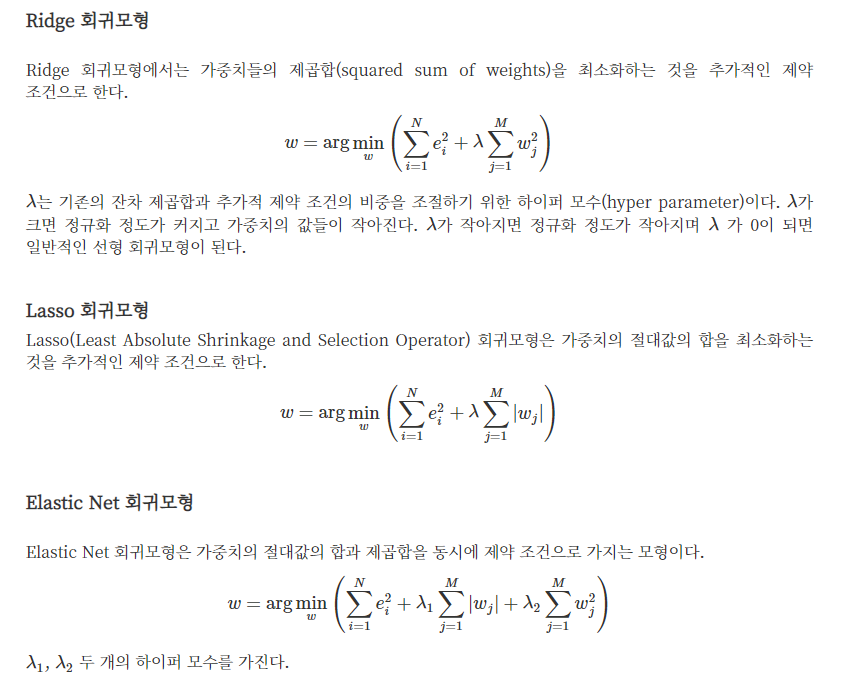

In [2]:
from IPython.display import Image
Image('./ml_source_files/ridge_lasso_1.png')

In [37]:
import mglearn
x, y = mglearn.datasets.load_extended_boston()

In [38]:
x[:5]

array([[0.00000000e+00, 1.80000000e-01, 6.78152493e-02, 0.00000000e+00,
        3.14814815e-01, 5.77505269e-01, 6.41606591e-01, 2.69203139e-01,
        0.00000000e+00, 2.08015267e-01, 2.87234043e-01, 1.00000000e+00,
        8.96799117e-02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.24000000e-02, 1.22067449e-02,
        0.00000000e+00, 5.66666667e-02, 1.03950948e-01, 1.15489186e-01,
        4.84565650e-02, 0.00000000e+00, 3.74427481e-02, 5.17021277e-02,
        1.80000000e-01, 1.61423841e-02, 4.59890803e-03, 0.00000000e+00,
        2.13492451e-02, 3.91636638e-02, 4.35107109e-02, 1.82560780e-02,
        0.00000000e+00, 1.41066072e-02, 1.94788482e-02, 6.78152493e-02,
        6.08166557e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [39]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

In [40]:
# y = wx + b

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [50]:
lr = LinearRegression()
lr.fit(x_train, y_train)
print('train acc :', lr.score(x_train,y_train), '\ntest acc :', lr.score(x_test, y_test))

# train이 당연히 높게 나오는 건 맞는데 train이 지나치게 높으므로 과적합 의심해봐야함

train acc : 0.9295925088768034 
test acc : 0.8963635527280822


In [51]:
# Ridge, Lasso, ElasticNet
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [52]:
rid = Ridge(alpha=0)
rid.fit(x_train, y_train)
print('train acc :', rid.score(x_train,y_train), '\ntest acc :', rid.score(x_test, y_test))
# alpha가 0이면 회귀식과 거의 같아짐. 당연한 소리이다.

train acc : 0.9292161273216271 
test acc : 0.8974043443744383


In [62]:
rid = Ridge(alpha=1)
rid.fit(x_train, y_train)
print('train acc :', rid.score(x_train,y_train), '\ntest acc :', rid.score(x_test, y_test)) # 과소적합

train acc : 0.8516648122039394 
test acc : 0.8863132551058602


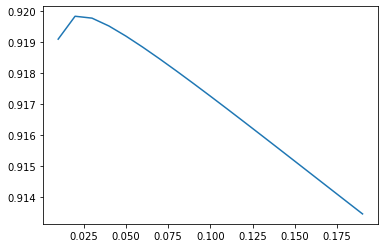

In [63]:
ridge_scores = []
for i in np.arange(0.01, 0.2, 0.01):
    rid = Ridge(alpha = i)
    rid.fit(x_train, y_train)
    ridge_scores.append(rid.score(x_test, y_test))

plt.plot(np.arange(0.01, 0.2, 0.01), ridge_scores)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1371.7500902645254, tolerance: 3.4166239678217827
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1381.8849646090623, tolerance: 3.4166239678217827
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1386.8195859448917, tolerance: 3.4166239678217827
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergence

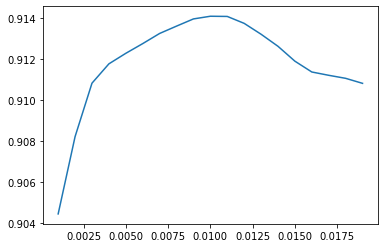

In [65]:
lasso_scores = []
for i in np.arange(0.0001, 0.002, 0.0001):
    las = Lasso(alpha = i)
    las.fit(x_train, y_train)
    lasso_scores.append(las.score(x_test, y_test))

plt.plot(np.arange(0.001, 0.02, 0.001), lasso_scores)
plt.show()

/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1722.8234180876254, tolerance: 3.4166239678217827
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1804.8251199660235, tolerance: 3.4166239678217827
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1899.8501726534316, tolerance: 3.4166239678217827
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: Convergence

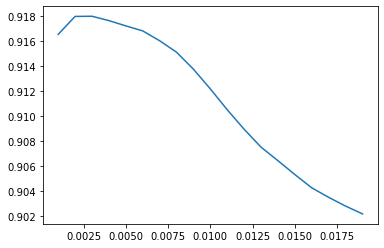

In [69]:
elastic_scores = []
for i in np.arange(0.0001, 0.002, 0.0001):
    ela = ElasticNet(alpha = i)
    ela.fit(x_train, y_train)
    elastic_scores.append(ela.score(x_test, y_test))

plt.plot(np.arange(0.001, 0.02, 0.001), elastic_scores)
plt.show()